### Median Rental Pricings in Manhattn  NYC, Pre and Post COVID-19
In this notebook I analyze the rental pricing pre and Post COVID-19 for most expensive city and borough in the world such as  Manhattan in New York.


This notebook will attempt to answer: What is the most expensind neighborhoods to rent  Manhattan,y, if any, while also examining if the COVID-19 period has affected the rental price? The notebook will utilize NYC rental data available on StreetEasy to attempt to answer the questions mentioned.

Some of the parameters set for this project include looking at data from the lfive six yefrom rs (January82015Decemberuary220
ng.

areaName is the name of the neighborhood, areaType is the setting oneighborhoodorhood, Borough is the New York county the neighborhood rewhile we have five Borough: Manhattan, Bronx, Brooklyn, Queens, staten Island for this project we analyse only Manhattan. 
s, and as mentioned, Price is the median rental price for that neighboations.




In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px    
import seaborn as sns



In [2]:
Rent= pd.read_csv("medianAskingRent_All.csv")


## Filter for Neighborhoods data only 
Rent=Rent[(Rent.areaType == 'neighborhood')] 

## Rearrange Dates as single column 
Rent = Rent.melt(id_vars=["areaName", "Borough","areaType"], 
        var_name="Date", 
        value_name="Price")

Rent = Rent[(Rent.Date >= '2018-01')]

Rent['Date'] = pd.to_datetime(Rent.Date) 
Rent.head()




,areaName,Borough,areaType,Date,Price
0,Battery Park City,Manhattan,neighborhood,2018-01-01,4150.0
1,Central Harlem,Manhattan,neighborhood,2018-01-01,2400.0
2,Central Park South,Manhattan,neighborhood,2018-01-01,7000.0
3,Chelsea,Manhattan,neighborhood,2018-01-01,3945.0
4,Chinatown,Manhattan,neighborhood,2018-01-01,2673.0


In [3]:
Rent.Price.mean()


3737.6223316912974

In [4]:
## calculate the average price in a month 

monthly = Rent.groupby(Rent['Date'])['Price'].mean()
monthly = monthly.reset_index()

## first group by borough and date 
borough = Rent.groupby(['Date','Borough'])['Price'].mean()
borough = borough.reset_index()
borough

,Date,Borough,Price
0,2018-01-01,Manhattan,3485.066667
1,2018-02-01,Manhattan,3494.193548
2,2018-03-01,Manhattan,3492.741935
3,2018-04-01,Manhattan,3523.225806
4,2018-05-01,Manhattan,3584.733333
5,2018-06-01,Manhattan,3587.966667
6,2018-07-01,Manhattan,3602.419355
7,2018-08-01,Manhattan,3644.354839
8,2018-09-01,Manhattan,3642.612903
9,2018-10-01,Manhattan,3609.064516


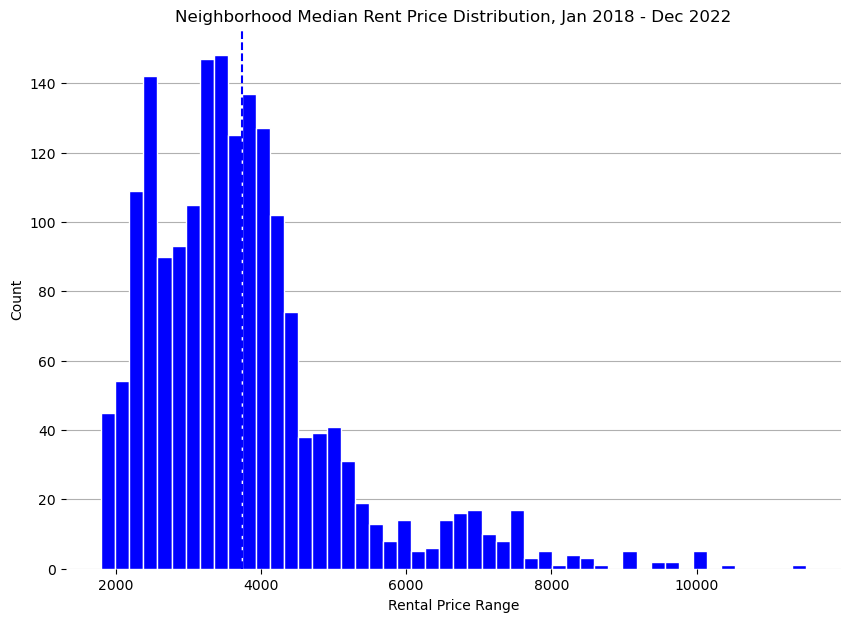

In [23]:
### distribution of the median rental pricing 

fig, ax = plt.subplots(figsize=(10, 7))    


ax.hist(Rent.Price, bins=50 , 
        color="blue", edgecolor='white')

ax.set(xlabel='Rental Price Range', ylabel='Count', title='Manhattan Neighborhood Median Rent Price Distribution, Jan 2018 - Dec 2022')

plt.axvline(Rent.Price.mean(), color='Blue', linestyle='dashed')

ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

Text(0.5, 1.0, 'The Median Price Distribution in Manhattan  (by Borough Jan 2018 - Dec 2022')

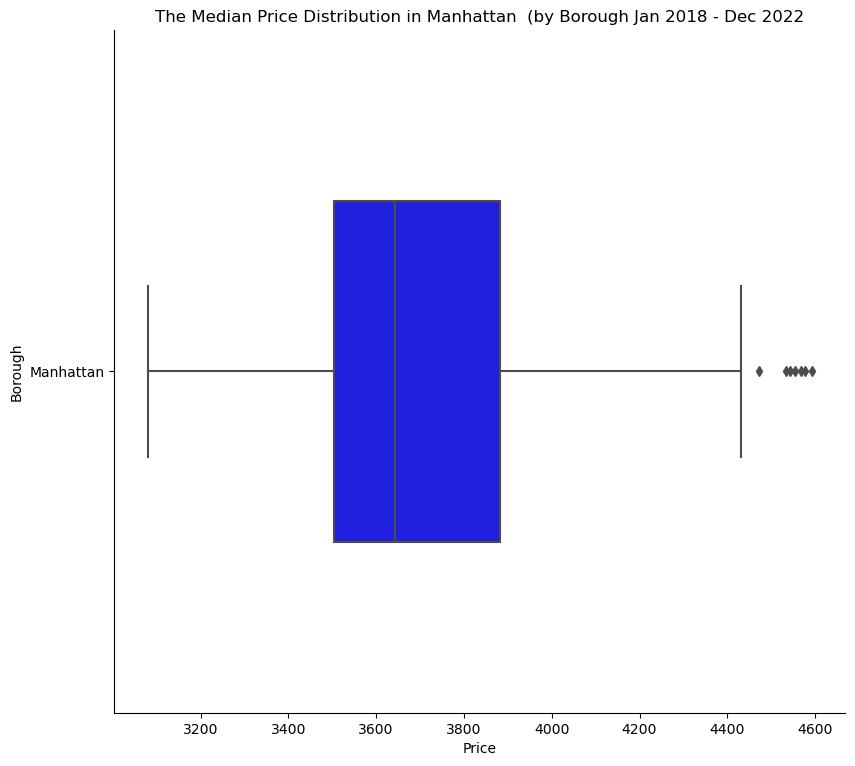

In [25]:

b = sns.catplot(x="Price", y="Borough", 
                color = 'blue',
                width=0.5,
                kind='box',
                data=borough)

b.fig.set_figwidth(10)
b.fig.set_figheight(8)  

plt.title('The Median Price Distribution in Manhattan  (by Borough Jan 2018 - Dec 2022')

Text(0.5, 1.0, 'The Median Price Distribution in Manhattan  (by Borough Jan 2018 - Dec 2022')

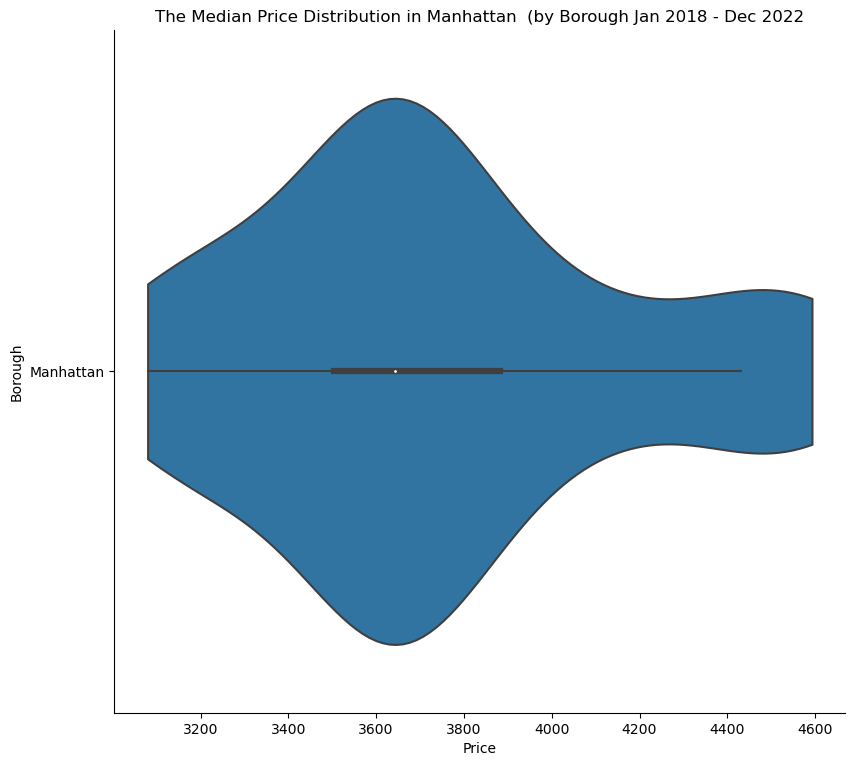

In [26]:
my_order = borough.groupby(by=["Borough"])["Price"].mean().iloc[::-1].index
my_order = my_order.sort_values()

k = sns.catplot(x= "Price", y="Borough", 
                kind= 'violin',
                cut= 0, hue_order=True,
                data= borough,
                order= my_order)

k.fig.set_figwidth(10)
k.fig.set_figheight(8)     

plt.title('The Median Price Distribution in Manhattan  (by Borough Jan 2018 - Dec 2022')

In [8]:
print(borough.groupby(by=["Borough"])["Price"].mean())


Borough
Manhattan    3739.463513
Name: Price, dtype: float64


In [32]:
std_price = borough.groupby(by=["Borough"])["Price"].std()
std_price

Borough
Manhattan    417.068938
Name: Price, dtype: float64

To explore the distribution of median rental pricing for each neighborhood, I used a violin plot, boxplot and histogram. 
From the first  chart, we can see thatit is not normal distributed. One of main reason of big difference betweeen avarage rental prices is  top  neigborhood,those grafs we see below.
We see standart deviation is 417As we know standart deviation is the avreage amount of variability in your dataset. It tells you, on average,how far each value lies from the mean. . 417$ standard deviation means that values are generally far from the mean.


### Examining Trends of Median Pricing through Time Series


[Text(0, 0.5, 'Median Rental Price'),
 Text(0.5, 1.0, 'Median-Rental Price in Manhattan  (by Borough Jan 2018 - Dec 2022')]

<Figure size 12800x9600 with 0 Axes>

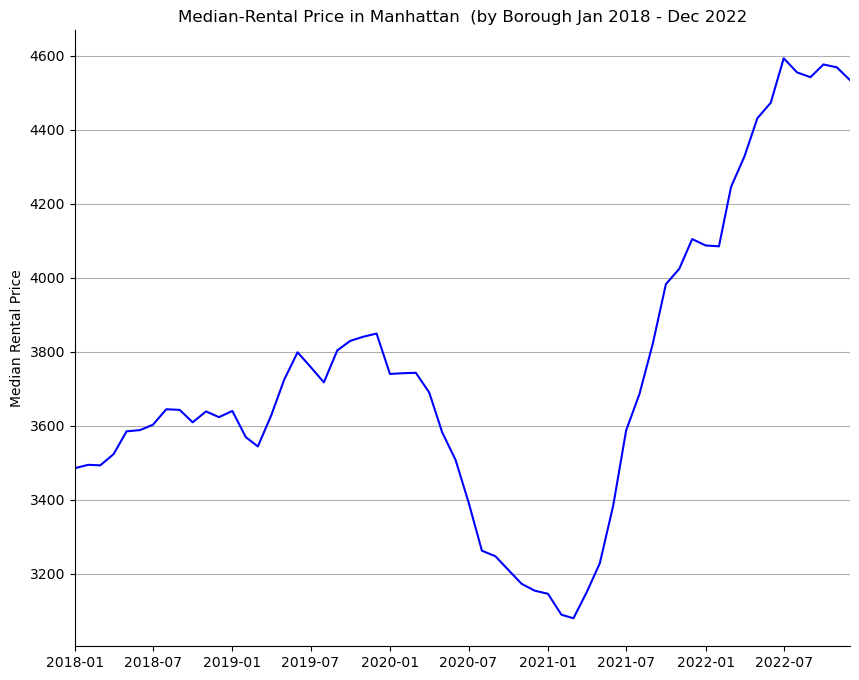

In [33]:
### A Time Series: five Year Examination

Manhattan = borough[(borough.Borough == 'Manhattan')] 

## time series
plt.figure(dpi=2000)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Manhattan.Date, Manhattan.Price, 'blue',label='Manhattan')
                            
ax.set_xlim(borough.Date.min(), borough.Date.max())       

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.grid(axis='y')                                      
ax.set_axisbelow(True)       
ax.set(ylabel='Median Rental Price', title = 'Median-Rental Price in Manhattan  (by Borough Jan 2018 - Dec 2022')


<Figure size 1920x1080 with 0 Axes>

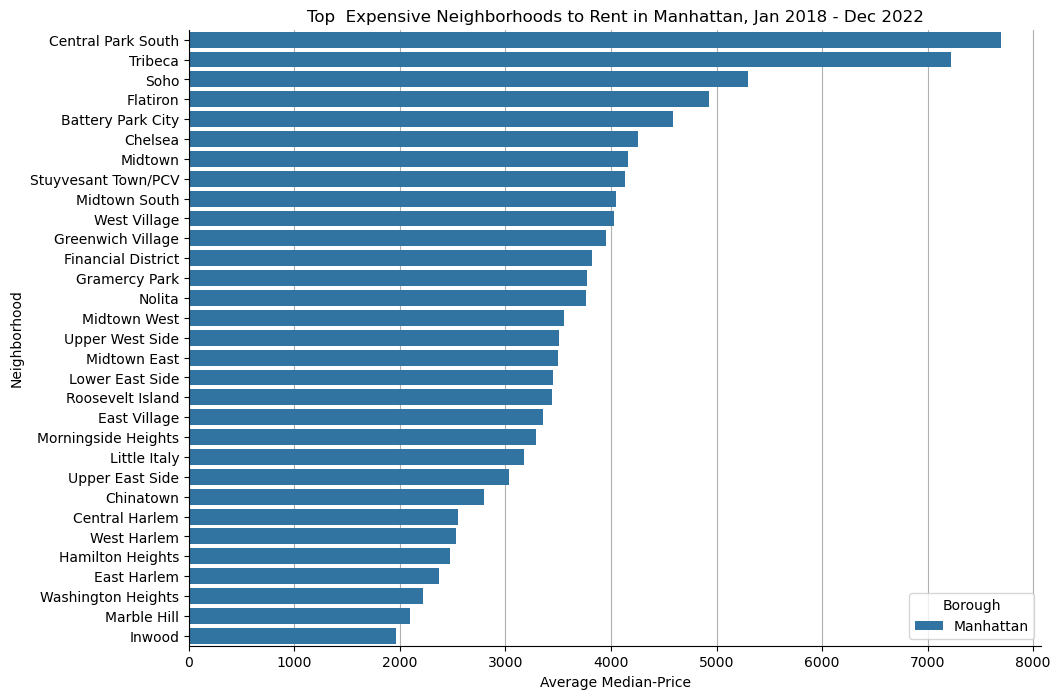

In [35]:
### Horizontal Plot of the most expensive neighborhoods 

#first group by neighborhood & compute mean price for each area
nhood = Rent.groupby(['areaName','Borough'])['Price'].mean().reset_index()

#next filter for the top  neighborhoods
tophoods = nhood.nlargest(33,'Price')
#lastly sort by highest to lowest
tophoods = tophoods.sort_values(by = 'Price', ascending=False)
tophoods

# horizontal bar chart
fig = plt.figure(figsize=(19.20,10.80))
fig, ax = plt.subplots(figsize=(11, 8))        

sns.barplot(y='areaName', x="Price", hue="Borough", data=tophoods,dodge=False) 

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.set(xlabel = 'Average Median-Price', ylabel='Neighborhood', 
      title = 'Top  Expensive Neighborhoods to Rent in Manhattan, Jan 2018 - Dec 2022') 

ax.grid(axis='x')                                      # show horizontal grid lines only
ax.set_axisbelow(True)                                 # show grid behind shape

In this section, we're still looking at the average median rental price but we have a horizontal bar chart representing the most expensive neighborhoods to rent in Manhattan. This plot allows us to clearly see what are the most expensive neighborhoods. From this, we see that the majority of the most expensive neighborhoods are Cental park South, Tribeca, Soho, Flatiron, Battery park city, chelsa, Midtown. If you're going to want to live in the top expensive neighborhoods in Manhattan, expect to pay at least on average $4,400 for rent.

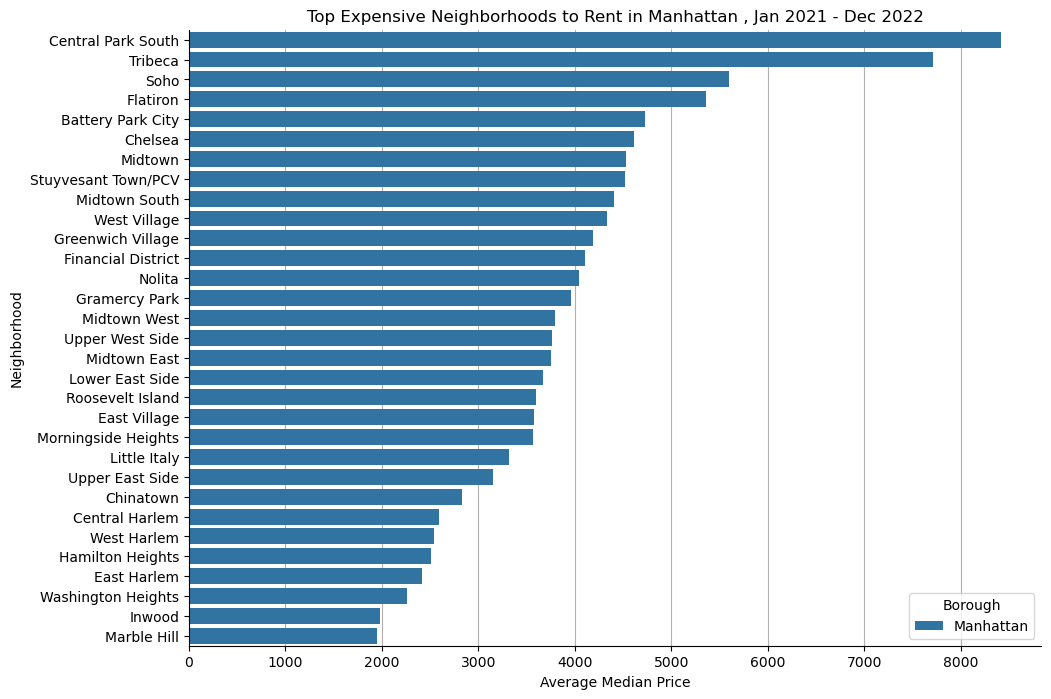

In [36]:
Rent_2021_2022 = Rent[(Rent['Date'] >= '2021-01-01') & (Rent['Date'] <= '2022-12-31')]

# Group by areaName and Borough, and calculate the mean price
nhood = Rent_2021_2022.groupby(['areaName', 'Borough'])['Price'].mean().reset_index()

# Next, filter for the top 30 neighborhoods
tophoods = nhood.nlargest(33, 'Price')

# Lastly, sort by highest to lowest
tophoods = tophoods.sort_values(by='Price', ascending=False)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 8))
sns.barplot(y='areaName', x="Price", hue="Borough", data=tophoods, dodge=False, ax=ax)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels and title
ax.set(xlabel='Average Median Price', ylabel='Neighborhood', 
       title='Top Expensive Neighborhoods to Rent in Manhattan , Jan 2021 - Dec 2022')

# Show grid lines
ax.grid(axis='x')
ax.set_axisbelow(True)  # Show grid behind bars

In this section, we're still looking at the average median rental price but we have a horizontal bar chart representing the  most expensive neighborhoods to rent in Manhattan after covid Jan 2021-Dec 2022.
As we see maximum rental price increased  minumum price stay the same top five  neighborhoods stay the same.

In [12]:
# Convert 'Date' column to datetime format
Rent['Date'] = pd.to_datetime(Rent['Date'])

# Extract year from 'Date' column
Rent['Year'] = Rent['Date'].dt.year

# Group data by 'areaName' and 'Year', then calculate the mean price
annual_average_price_by_area = Rent.groupby(['areaName', 'Year'])['Price'].mean()

# Reset index to make 'areaName' and 'Year' columns regular columns
annual_average_price_by_area = annual_average_price_by_area.reset_index()

# Print the result
annual_average_prices = Rent.groupby(['areaName','Year'])['Price'].mean().reset_index()

annual_average_prices

,areaName,Year,Price
0,Battery Park City,2018,4494.750000
1,Battery Park City,2019,4784.833333
2,Battery Park City,2020,4200.416667
3,Battery Park City,2021,4273.750000
4,Battery Park City,2022,5180.916667
...,...,...,...
150,West Village,2018,3799.416667
151,West Village,2019,4018.916667
152,West Village,2020,3660.416667
153,West Village,2021,3766.500000


In [13]:
annual_average_prices
top_five=annual_average_prices[annual_average_prices['Year']==2022].sort_values('Price', ascending=False).reset_index(drop=True).loc[0:6,'areaName']
top_five

0    Central Park South
1               Tribeca
2                  Soho
3              Flatiron
4     Battery Park City
5               Chelsea
6               Midtown
Name: areaName, dtype: object

In [14]:
tophoods

,areaName,Borough,Price
2,Central Park South,Manhattan,8414.500000
25,Tribeca,Manhattan,7712.416667
23,Soho,Manhattan,5593.125000
8,Flatiron,Manhattan,5357.875000
0,Battery Park City,Manhattan,4727.333333
3,Chelsea,Manhattan,4609.291667
16,Midtown,Manhattan,4529.000000
24,Stuyvesant Town/PCV,Manhattan,4518.791667
18,Midtown South,Manhattan,4409.208333
30,West Village,Manhattan,4334.916667


D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


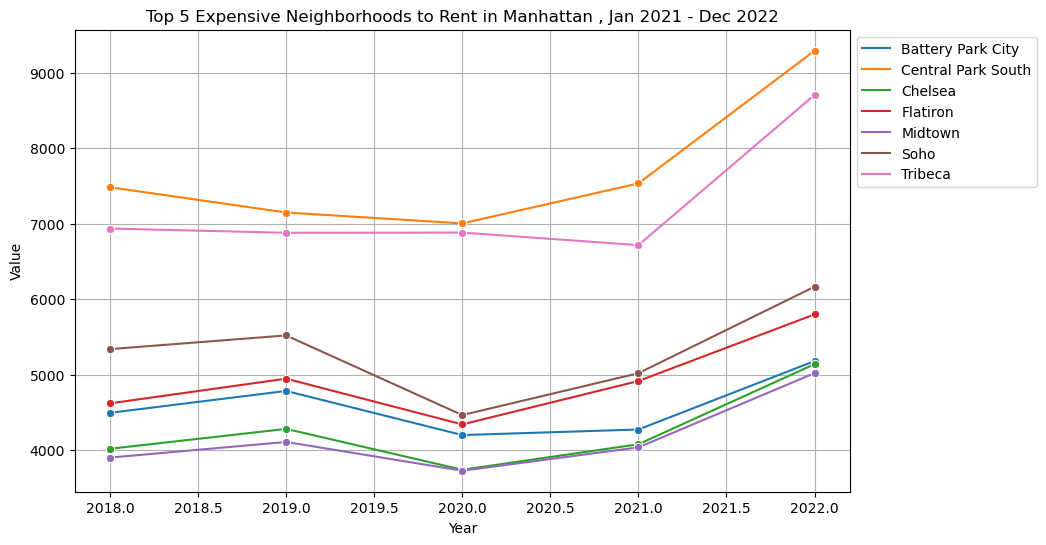

In [37]:

# Filter for the top 5 expensive neighborhoods
tophoods = annual_average_prices[annual_average_prices['areaName'].isin(top_five)]

# Create a plot for each area
# Set the size of the figure
plt.figure(figsize=(10, 6))
# Create a line plot
sns.lineplot(data=tophoods, x='Year', y='Price', hue='areaName', marker='o', style='areaName', dashes=False)
# Adding plot title and labels
plt.title('Top 5 Expensive Neighborhoods to Rent in Manhattan , Jan 2021 - Dec 2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area

plt.grid(True)  # Optional: Add grid for better readability
# Display the plot
plt.show()

In [16]:
annual_average_prices

last_five = annual_average_prices[annual_average_prices['Year'] == 2022].sort_values('Price', ascending=False).reset_index(drop=True).loc[25:31, 'areaName']
last_five


25           West Harlem
26      Hamilton Heights
27           East Harlem
28    Washington Heights
29           Marble Hill
30                Inwood
Name: areaName, dtype: object

D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


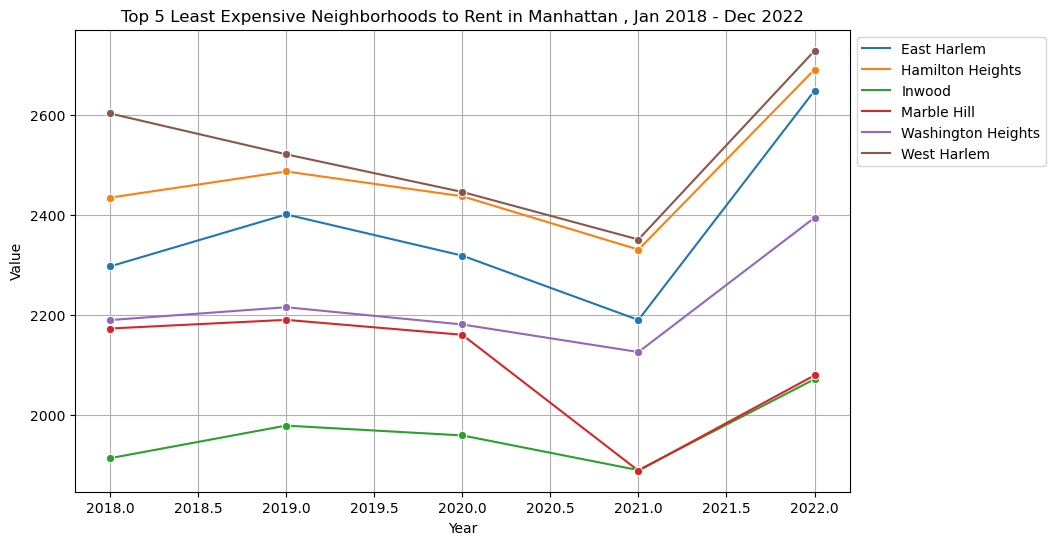

In [40]:

lasthoods = annual_average_prices[annual_average_prices['areaName'].isin(last_five)]

# Create a plot for each area
# Set the size of the figure
plt.figure(figsize=(10, 6))
# Create a line plot
sns.lineplot(data=lasthoods, x='Year', y='Price', hue='areaName', marker='o', style='areaName', dashes=False)
# Adding plot title and labels
plt.title('Top 5 Least Expensive Neighborhoods to Rent in Manhattan , Jan 2018 - Dec 2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
plt.grid(True)  # Optional: Add grid for better readability
# Display the plot
plt.show()

D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda instal folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


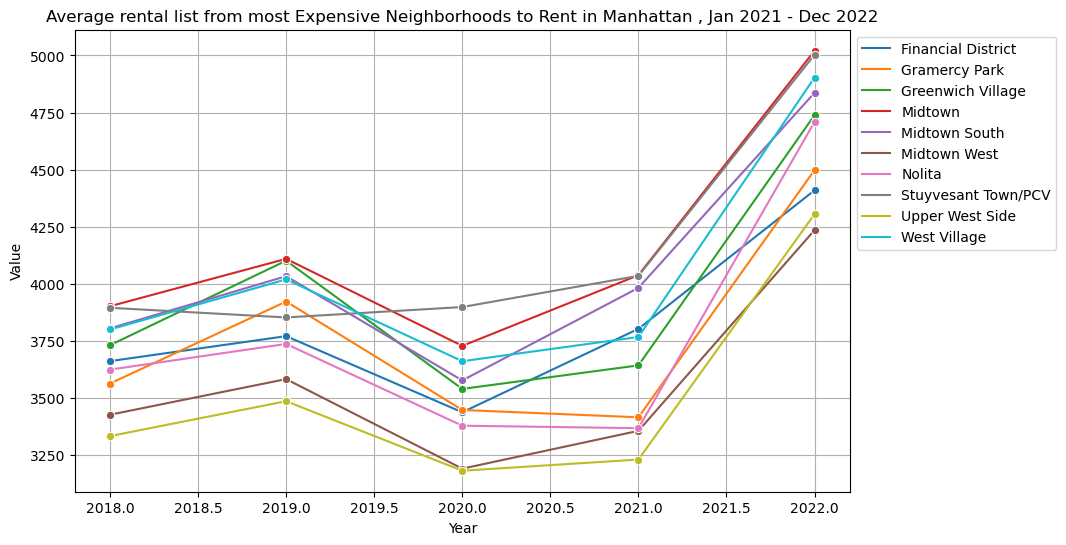

In [43]:

Middle = annual_average_prices[annual_average_prices['Year'] == 2022].sort_values('Price', ascending=False).reset_index(drop=True).loc[6:15, 'areaName']

tophoods = annual_average_prices[annual_average_prices['areaName'].isin(Middle)]

# Create a plot for each area
# Set the size of the figure
plt.figure(figsize=(10, 6))
# Create a line plot
sns.lineplot(data=tophoods, x='Year', y='Price', hue='areaName', marker='o', style='areaName', dashes=False)
# Adding plot title and labels
plt.title('Average rental list from most Expensive Neighborhoods to Rent in Manhattan , Jan 2021 - Dec 2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
plt.grid(True)  # Optional: Add grid for better readability
# Display the plot
plt.show()

If we analyse how prices changed during covide and after covid we see prices decrease durinc covid-19 for all neighborhood except top two neighborhood.From 2021 prices increased dramaticly for all neighborhood except last two neighborhood


An analysis of rental price trends reveals a notable decrease across most neighborhoods during the COVID-19 period. However, the top two neighborhoods experienced relatively stable prices. Subsequently, from 2021 onwards, there was a significant uptick in prices across all neighborhoods, except for the last two neighborhoods.